In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split # machine learning

# Set the maximum number of columns and rows to display to a large number
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
df_walmart = pd.read_excel('/content/walmart.xlsx')

In [ ]:
df_walmart.head()

,Order ID,Order Date,Ship Date,Customer Name,Country,City,State,Category,Product Name,Sales,Quantity,Profit
0,CA-2013-138688,2013-06-13,2013-06-17,Darrin Van Huff,United States,Los Angeles,California,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,6.8714
1,CA-2011-115812,2011-06-09,2011-06-14,Brosina Hoffman,United States,Los Angeles,California,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.860,7,14.1694
2,CA-2011-115812,2011-06-09,2011-06-14,Brosina Hoffman,United States,Los Angeles,California,Art,Newell 322,7.280,4,1.9656
3,CA-2011-115812,2011-06-09,2011-06-14,Brosina Hoffman,United States,Los Angeles,California,Phones,Mitel 5320 IP Phone VoIP phone,907.152,4,90.7152
4,CA-2011-115812,2011-06-09,2011-06-14,Brosina Hoffman,United States,Los Angeles,California,Binders,DXL Angle-View Binders with Locking Rings by S...,18.504,3,5.7825


In [ ]:
df_walmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3203 entries, 0 to 3202
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       3203 non-null   object        
 1   Order Date     3203 non-null   datetime64[ns]
 2   Ship Date      3203 non-null   datetime64[ns]
 3   Customer Name  3203 non-null   object        
 4   Country        3203 non-null   object        
 5   City           3203 non-null   object        
 6   State          3203 non-null   object        
 7   Category       3203 non-null   object        
 8   Product Name   3203 non-null   object        
 9   Sales          3203 non-null   float64       
 10  Quantity       3203 non-null   int64         
 11  Profit         3203 non-null   float64       
dtypes: datetime64[ns](2), float64(2), int64(1), object(7)
memory usage: 300.4+ KB


## Data Preprocessing


In [ ]:
# duplikat
len(df_walmart.drop_duplicates())

3203

In [ ]:
len(df_walmart)

3203

In [ ]:
len(df_walmart.drop_duplicates()) / len(df_walmart)
#jika output dari code di cell ini tidak bernilai 1 maka terdapat duplikat

1.0

Tidak ada duplikasi

In [ ]:
# missing value
df_walmart.isna().sum()

,0
Order ID,0
Order Date,0
Ship Date,0
Customer Name,0
Country,0
City,0
State,0
Category,0
Product Name,0
Sales,0


Tidak ada missing value

In [ ]:
df_walmart['Order Date'] = pd.to_datetime(df_walmart['Order Date'])
df_walmart['Ship Date'] = pd.to_datetime(df_walmart['Ship Date'])
df_dates_desc = df_walmart[['Order Date', 'Ship Date']]
df_dates_numeric = df_dates_desc.apply(lambda x: x.astype('int64') // 10**9 // 86400)
df_dates_numeric.describe()

,Order Date,Ship Date
count,3203.000000,3203.000000
mean,15835.129254,15839.059319
std,421.909981,421.833652
min,14981.000000,14983.000000
25%,15482.000000,15486.000000
50%,15908.000000,15911.000000
75%,16213.000000,16217.000000
max,16435.000000,16441.000000


In [ ]:
# melihat data statistik setelah diubah format date
df_walmart['Order Date'] = pd.to_datetime(df_walmart['Order Date'])
df_walmart['Ship Date'] = pd.to_datetime(df_walmart['Ship Date'])

# Salin dataframe & ubah kolom date jadi integer (jumlah hari)
df_temp = df_walmart.copy()
date_cols = df_temp.select_dtypes(include='datetime64[ns]').columns

for col in date_cols:
    df_temp[col] = df_temp[col].astype('int64') // 10**9 // 86400  # konversi ke hari

# Sekarang describe menampilkan statistik untuk tanggal juga
df_temp.describe()

,Order Date,Ship Date,Sales,Quantity,Profit
count,3203.000000,3203.000000,3203.000000,3203.000000,3203.000000
mean,15835.129254,15839.059319,226.493233,3.828910,33.849032
std,421.909981,421.833652,524.876877,2.260947,174.109081
min,14981.000000,14983.000000,0.990000,1.000000,-3399.980000
25%,15482.000000,15486.000000,19.440000,2.000000,3.852000
50%,15908.000000,15911.000000,60.840000,3.000000,11.166400
75%,16213.000000,16217.000000,215.809000,5.000000,33.000400
max,16435.000000,16441.000000,13999.960000,14.000000,6719.980800


In [ ]:
#melihat data yang tipe object
df_walmart.describe(include='object')

,Order ID,Customer Name,Country,City,State,Category,Product Name
count,3203,3203,3203,3203,3203,3203,3203
unique,1611,686,1,169,11,17,1494
top,CA-2013-165330,William Brown,United States,Los Angeles,California,Binders,Staples
freq,11,24,3203,747,2001,471,60


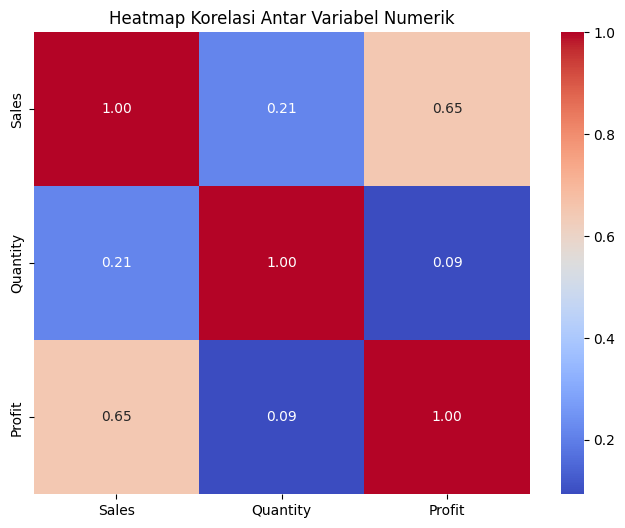

In [ ]:
# heatmap untuk melihat korelasi antar variabel
df_num = df_walmart.select_dtypes(include='number')

# 3. Hitung korelasi
corr_matrix = df_num.corr()

# 4. Visualisasikan korelasi dalam bentuk heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap Korelasi Antar Variabel Numerik")
plt.show()

- Hubungan antara profit dan sales cukup kuat, dengan nilai 0,65. Kenaikan sales berarti cenderung meningkatkan profit.
- Quantity tidak cenderung memengaruhi profit secara langsung. kemungkinan adanya variasi harga
- Untuk meningkatkan profit kita bisa fokus ke harga jual, bukan hanya banyaknya barang terjual